## Retreive UCSC Table Browser Data

Source : https://genome.ucsc.edu/cgi-bin/hgTables?hgsid=1504168063_RgJSCtruU83UTHhk6RHyytGupxL3

In [11]:
import pandas as pd
TRAV_list = pd.read_csv("TRAV_UCSC.tsv", sep = "\t")

positions = TRAV_list[["txStart","txEnd"]]
TRAV_list.to_csv('TRAV_UCSC.tsv', sep="\t")
TRAV_list

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Unnamed: 0.1.1.1.1,Unnamed: 0.1.1.1.1.1,#name,chrom,strand,txStart,txEnd,cdsStart,cdsEnd,exonCount,exonStarts,exonEnds,proteinID,alignID
0,0,0,0,0,0,0,ENST00000542354.1,chr14,+,21621837,21622567,21621903,21622567,2,"21621837,21622284,","21621946,21622567,",A0A0B4J248,uc058zdj.1
1,1,1,1,1,1,1,ENST00000390423.2,chr14,+,21642888,21643578,21642972,21643578,2,"21642888,21643303,","21643015,21643578,",A0A0B4J238,uc058zdk.1
2,2,2,2,2,2,2,ENST00000390424.2,chr14,+,21712320,21712843,21712330,21712843,2,"21712320,21712569,","21712394,21712843,",A0A0B4J234,uc021roz.2
3,3,3,3,3,3,3,ENST00000390425.2,chr14,+,21723712,21724321,21723888,21724321,2,"21723712,21724024,","21723934,21724321,",A0A0B4J244,uc001wbn.5
4,4,4,4,4,4,4,ENST00000390426.2,chr14,+,21736151,21736982,21736218,21736982,2,"21736151,21736694,","21736258,21736982,",A0A0B4J268,uc001wbp.4
5,5,5,5,5,5,5,ENST00000390427.3,chr14,+,21749177,21749705,21749189,21749705,2,"21749177,21749417,","21749241,21749705,",A0A0B4J249,uc058zdm.1
6,6,6,6,6,6,6,ENST00000390428.3,chr14,+,21768488,21769080,21768495,21769080,2,"21768488,21768792,","21768604,21769080,",A0A075B6T7,uc001wbt.2
7,7,7,7,7,7,7,ENST00000390429.3,chr14,+,21782992,21783503,21782992,21783503,2,"21782992,21783218,","21783044,21783503,",A0A075B6U4,uc058zdo.1
8,8,8,8,8,8,8,ENST00000390430.2,chr14,+,21797286,21797886,21797418,21797886,2,"21797286,21797591,","21797464,21797886,",A0A0A6YYK1,uc058zdp.1
9,9,9,9,9,9,9,ENST00000390431.3,chr14,+,21811501,21811977,21811501,21811977,2,"21811501,21811685,","21811547,21811977,",A0A075B6T8,uc001wbv.4


In [12]:
df = pd.read_csv("TRAV_list.txt", sep = "\n")
TRAV_names = df["HUGO"].values.tolist()
print(TRAV_names)

['TRAV1-1', 'TRAV1-2', 'TRAV2', 'TRAV3', 'TRAV4', 'TRAV5', 'TRAV6', 'TRAV7', 'TRAV8-1', 'TRAV8-2', 'TRAV8-3', 'TRAV8-4', 'TRAV8-5', 'TRAV8-6', 'TRAV8-7', 'TRAV9-1', 'TRAV9-2', 'TRAV10', 'TRAV11', 'TRAV12-1', 'TRAV12-2', 'TRAV12-3', 'TRAV13-1', 'TRAV13-2', 'TRAV14DV4', 'TRAV15', 'TRAV16', 'TRAV17', 'TRAV18', 'TRAV19', 'TRAV20', 'TRAV21', 'TRAV22', 'TRAV23DV6', 'TRAV24', 'TRAV25', 'TRAV26-1', 'TRAV26-2', 'TRAV27', 'TRAV28', 'TRAV29DV5', 'TRAV30', 'TRAV31', 'TRAV32', 'TRAV33', 'TRAV34', 'TRAV35', 'TRAV36DV7', 'TRAV37', 'TRAV38-1', 'TRAV38-2DV8', 'TRAV39', 'TRAV40', 'TRAV41']


## Parse sequence with SAMtools Faidx

In [13]:
seq_list = []
exon_list = []
intron_list = []
seq = ''
exon = ''
intron = ''

f = open("TRAV_sequences", "r")
f.readline()
input_list = f.readlines()
f.close()

for input in input_list:
    if input[0] == ">":
        seq_list.append(seq)
        exon_list.append(exon)
        intron_list.append(intron)
        seq = ''
        exon = ''
        intron = ''
        continue
    for i in input:
        if i.isupper():
            seq += i
            exon += i
        # other characters not appended
        if i.islower():
            seq += i.upper()
            intron += i.upper()

seq_list.append(seq)
exon_list.append(exon)
intron_list.append(intron)

In [23]:
IDX =18

print(TRAV_names[IDX]+" sequence : \n"+seq_list[IDX] + "\n")
print(TRAV_names[IDX]+" exon : \n"+exon_list[IDX] + "\n")
print(TRAV_names[IDX]+" intron : \n"+intron_list[IDX] + "\n")

TRAV11 sequence : 
ATGCTCCTGGTGCTCATCCCACTGCTGGGGATACATTTTGTCCTGAGTGAGTAAAATTTCTTTATCATCTCTAGTTCCACAGGTTCTGACTAGAAATGCTTGCTTTTTATACTGAGTCTGCACTGCTTTCACTGATAGTACATTACTTTTTCAGGAACTGTCAGAGCCCAGTCAGTGACCCAGCCTGACATCCGCATCACTGTCTCTGAAGGAGCCTCACTGGAGTTGAGATGTAACTATTCCTATGGGGCGATGTTGTGGGAAGTCAGGGACCCCAAACGGAGGGACCGGCTGAAGCCATGGCAGAAGAATGTGGATTGTGAAGATTTCATGGACATTTATTAGTTCCCCAAATTAATACTTTTATAATTTCTTATGCCTCTCTTTACTGCAATCTCTAAACATAAATTGTAAAGATTTCATGGACACTTATCACTTCCCCAATCAATACCCCTGTGATTTCCTATGCCTGTCTTTACTTTAATCTCTTAATCCTGTCAGCTGAGGAGGATGTATGTCACCTCAGGACCCTGTGATAATTGTGTTAACTGCACAAATTATAGAGCATGTGTGTTCAAACAATATGAAATCTGGGCACCTTGAAAAAAGAACAGGATAACAGCAATGTTCAGGGAATAAGAGAGATAACCTTAAACTCTGACTGCCAGTGAGCCAGGCGGAACAGAGCCATATTTCTCTTCTTTCAAAAGCAAATGGGAGAAATATGGCTGAATTCTTTTTCTCAGCAAGGAACATCCCTGGGGAAGAGAATACGTGCCTGGGGGTGGGTCTATAGACGGCCCCCTTGGGTGTGGCCATCTTCTATAGTCAAAACTGTAGGGGTGAAATAAATCCCAGTCTCCCATAGCACTCCCAGGCTTATTAGGAAGAGGAAATTCCCACCTAATAAATTTTGGTCAGACTGGCTGCTCTCAAAACCCTGTCTCCTGATAAGATGTTATCAATGACAATGGTGCCCGA

In [51]:
x = []
for i in range(len(seq_list)):
    x.append(len(seq_list[i]))
print(min(x), max(x))

249 1522


## Compute Alignment Scores

In [65]:
from Bio import pairwise2
from Bio.pairwise2 import format_alignment

matrix = [[] for _ in range(len(seq_list))]
for i in range(len(seq_list)):
    for j in range(len(seq_list)):
        alignments = pairwise2.align.globalms(seq_list[i],seq_list[j], 1, -4, -6, -1)
        matrix[i].append(alignments[0][2])

In [66]:
aln_score = pd.DataFrame(matrix)
aln_score

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,730.0,87.0,-694.0,-776.0,-904.0,-753.0,-782.0,-696.0,-768.0,-688.0,...,-886.0,-760.0,-801.0,-730.0,-724.0,-774.0,-802.0,-737.0,-692.0,-722.0
1,87.0,690.0,-697.0,-754.0,-905.0,-733.0,-772.0,-676.0,-710.0,-671.0,...,-877.0,-749.0,-760.0,-693.0,-699.0,-729.0,-766.0,-682.0,-650.0,-699.0
2,-694.0,-697.0,523.0,-660.0,-833.0,-591.0,-655.0,-586.0,-627.0,-548.0,...,-775.0,-670.0,-649.0,-604.0,-609.0,-642.0,-664.0,-584.0,-530.0,-572.0
3,-776.0,-754.0,-660.0,609.0,-852.0,-648.0,-710.0,-663.0,-493.0,-538.0,...,-811.0,-735.0,-707.0,-671.0,-677.0,-663.0,-723.0,-638.0,-581.0,-639.0
4,-904.0,-905.0,-833.0,-852.0,831.0,-818.0,-815.0,-812.0,-841.0,-793.0,...,-743.0,-841.0,-873.0,-820.0,-812.0,-815.0,-854.0,-797.0,-800.0,-784.0
5,-753.0,-733.0,-591.0,-648.0,-818.0,528.0,-555.0,-508.0,-661.0,-531.0,...,-798.0,-548.0,-541.0,-498.0,-505.0,-628.0,-650.0,-511.0,-515.0,-480.0
6,-782.0,-772.0,-655.0,-710.0,-815.0,-555.0,592.0,-550.0,-706.0,-609.0,...,-793.0,-607.0,-639.0,-544.0,-595.0,-668.0,-710.0,-505.0,-627.0,-550.0
7,-696.0,-676.0,-586.0,-663.0,-812.0,-508.0,-550.0,511.0,-623.0,-564.0,...,-771.0,-580.0,-562.0,-450.0,-531.0,-628.0,-648.0,-500.0,-543.0,-423.0
8,-768.0,-710.0,-627.0,-493.0,-841.0,-661.0,-706.0,-623.0,600.0,-570.0,...,-825.0,-717.0,-724.0,-669.0,-682.0,-673.0,-734.0,-641.0,-555.0,-676.0
9,-688.0,-671.0,-548.0,-538.0,-793.0,-531.0,-609.0,-564.0,-570.0,476.0,...,-744.0,-643.0,-602.0,-542.0,-574.0,-611.0,-635.0,-574.0,-344.0,-573.0


In [50]:
x = aln_score.values.tolist()
y = []
for i in range(len(x)):
    for j in range(len(x)):
        if i != j:
            y.append(x[i][j])
print(max(y))


231.0


## Normalize Alignment Scores

In [67]:
min_score = aln_score.min().min()
max_score = aln_score.max().max()

normal_aln_score = (aln_score-min_score)/(max_score-min_score)

## Heatmap Visulaization

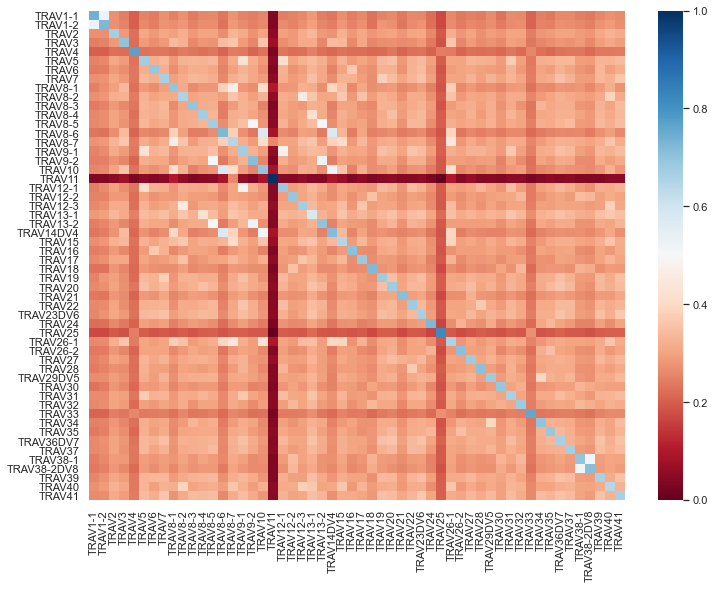

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 9))
sns.set(font_scale=1)
ax = sns.heatmap(normal_aln_score, xticklabels = TRAV_names, yticklabels = TRAV_names, cmap='RdBu')